In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation, NMF, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
import pickle
import seaborn as sns
%matplotlib inline

In [125]:
sns.set_style('whitegrid')

In [3]:
filepath = "./data/outputs/autonomous_tokenized.pkl"
df = pd.read_pickle(filepath)

In [6]:
df.head(2)

,id,title,assignee,inventor/author,priority date,filing/creation date,publication date,grant date,result link,abstract,text
priority date,,,,,,,,,,,
2018-01-02,US-2019204842-A1,Trajectory planner with dynamic cost learning ...,GM Global Technology Operations LLC,"Sayyed Rouhollah Jafari Tafti, Guangyu J. Zou,...",2018-01-02,2018-01-02,2019-07-04,NaT,https://patents.google.com/patent/US2019020484...,"[, Abstract\nA vehicle, system and method of a...",navigation reference trajectory navigate train...
2012-04-13,US-9315178-B1,Model checking for autonomous vehicles,Google Inc.,"David I. Ferguson, Dmitri A. Dolgov, Christoph...",2012-04-13,2012-04-13,2016-04-19,2016-04-19,https://patents.google.com/patent/US9315178B1/en,"[, Abstract\nIn an example method, a vehicle c...",operate mode predict output base input control...


In [105]:
vectorizer = TfidfVectorizer(max_df=.98, min_df=2,stop_words='english')
cmf = NMF(n_components=10, random_state=1, alpha=.1, l1_ratio=.5)

In [106]:
vect_trans = vectorizer.fit_transform(df.text)
feature_names = vectorizer.get_feature_names_out()

In [107]:
cmf.fit(vect_trans)

/opt/conda/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1422: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


NMF(alpha=0.1, l1_ratio=0.5, n_components=10, random_state=1)

In [108]:
def get_topic_words(model, feature_names, n_top_words=5):
    topics = dict()
    for topic_idx, topic in enumerate(model.components_):    
        topic = zip(feature_names, topic)
        topic = sorted(topic, key=lambda pair: -pair[1])
        topic_words = [(token, counts) for token, counts in topic[:n_top_words]]
        topics[f'Topic_{topic_idx}'] = topic_words
    return topics

In [114]:
topic_words = get_topic_words(cmf, feature_names)

In [133]:
def plot_topic_words(topic_words, cols=2, rows=5, figsize=(15,15), colors=None):
    if colors is None:
        colors = sns.color_palette()
    plot_matrix = np.arange(cols*rows).reshape(rows,cols)    
    fig, ax = plt.subplots(figsize=figsize, nrows=rows, ncols=cols)
    row = 0
    for topic_id, topic in enumerate(topic_words.items()):
        column = topic_id % cols
        pd.DataFrame(topic[1]).set_index(0)[1].plot(kind='barh', title=topic[0], ax=ax[row, column], color=colors[topic_id])
        row += 1 if column == (cols -1) else 0
    plt.tight_layout()

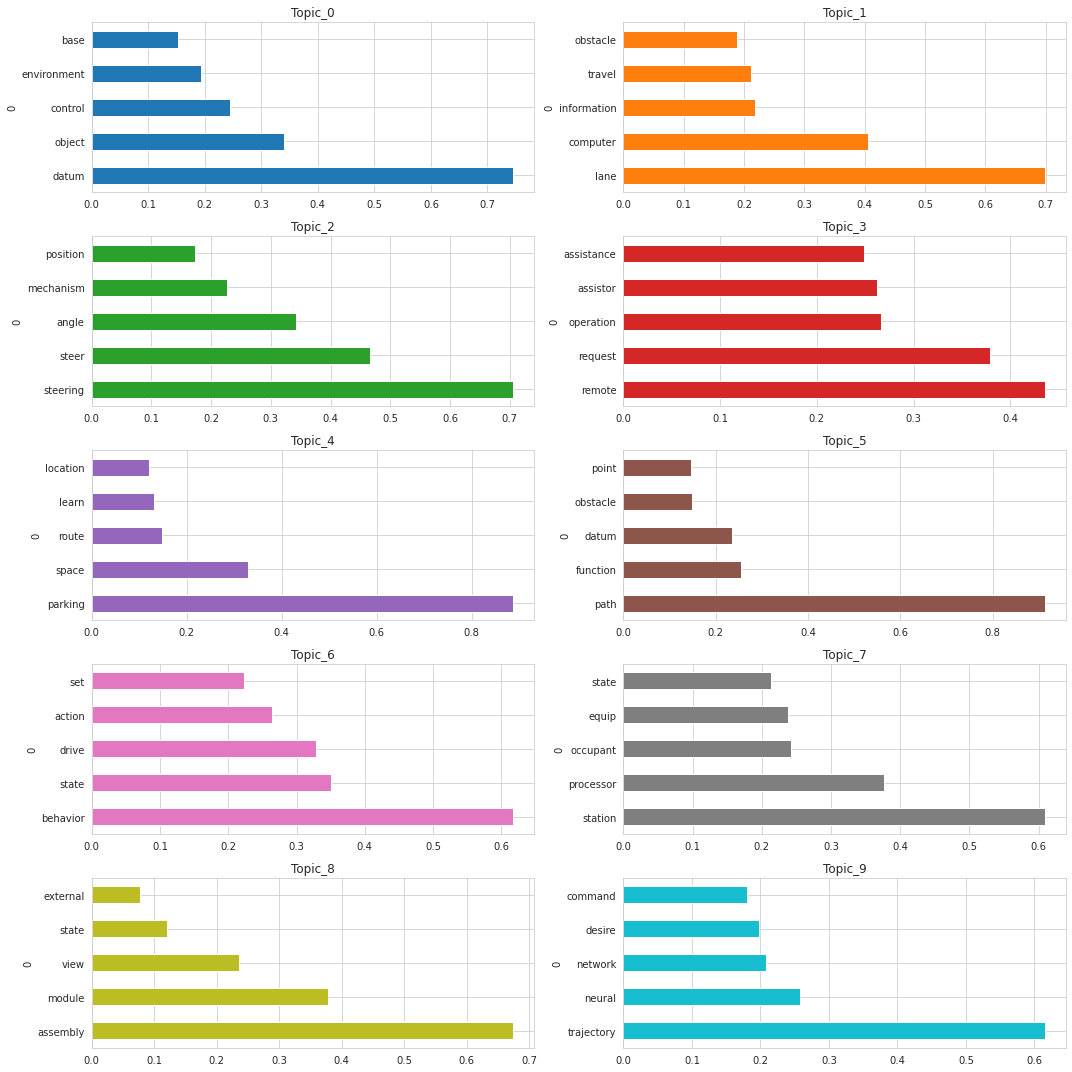

In [134]:
plot_topic_words(topic_words)

/opt/conda/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1422: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(


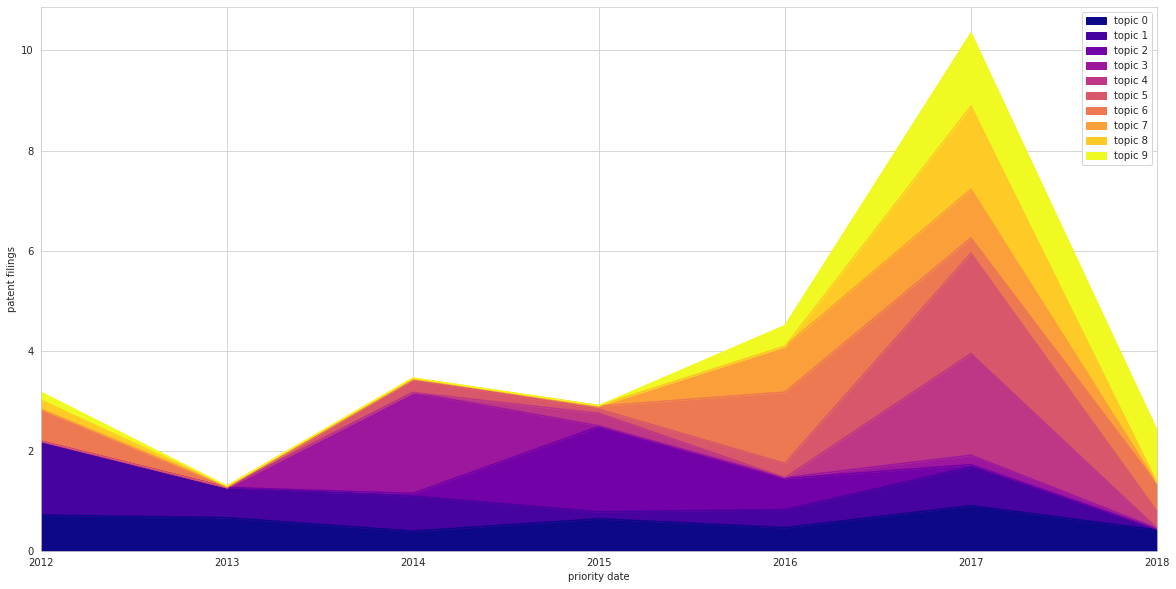

In [146]:


comp = cmf.transform(vect_trans)
document_topics = pd.DataFrame(comp, columns=["topic %d" % i for i in range(comp.shape[1])])
document_topics.index = df['priority date']
df_new = document_topics.groupby(pd.Grouper(freq='A')).sum()
df_Y = df_new.loc['2012-1-1':'2022-1-1']
df_Y.plot(kind = 'area', stacked = True, figsize = (20,10), colormap='plasma')
plt.ylabel('patent filings')
plt.show()

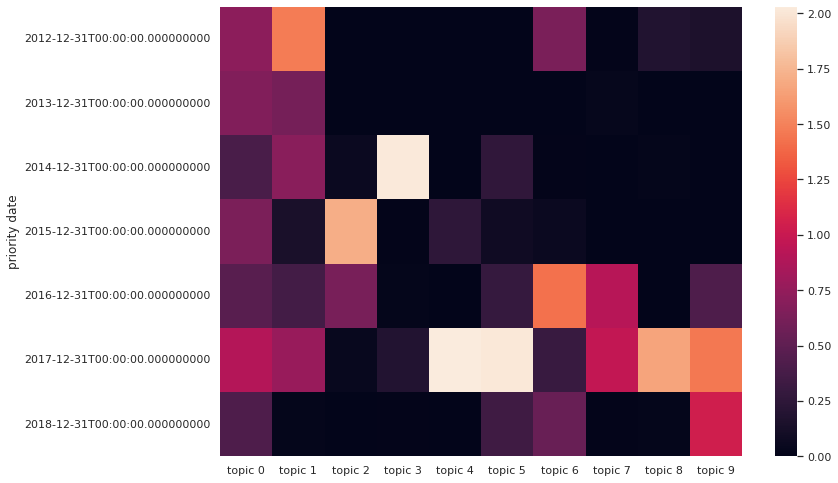

In [147]:
sns.set_style('ticks')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df_Y, xticklabels=True)
plt.show()

In [141]:
comp.shape[1]

10

## PCA to Visualize


In [148]:
from sklearn.decomposition import PCA
import time
from sklearn.preprocessing import normalize

In [150]:
feature_matrix = pd.DataFrame(vect_trans.toarray(), columns=feature_names)
feature_matrix.head()

,acceleration,accord,accordance,action,activate,actuator,additional,additionally,adjacent,analyze,...,transmit,travel,turn,type,unavailable,unreliable,use,view,wheel,wireless
0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.132659,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.083843,0.096734,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.091161,0.132904,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.062429,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.188395,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [152]:
pca = PCA(n_components=40)
vectors = pca.fit_transform(feature_matrix)

In [153]:
np.sum(pca.explained_variance_ratio_)

0.9467878086583055

Text(0, 0.5, 'PC 2')

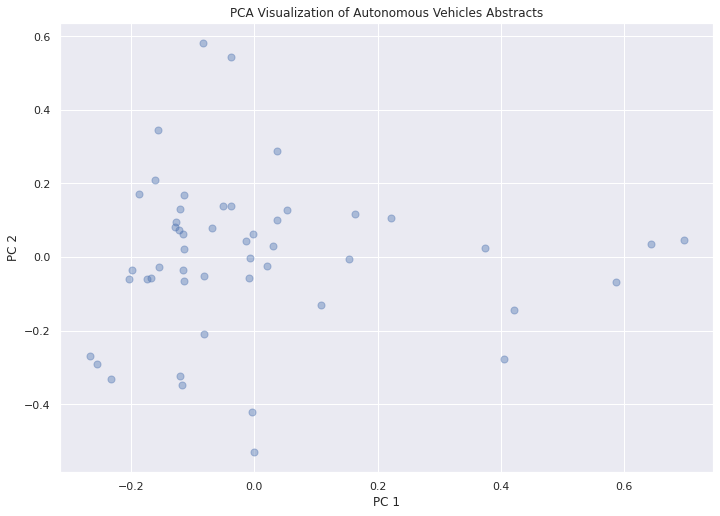

In [154]:
fig, ax = plt.subplots()
plt.scatter(vectors[:, 0], vectors[:, 1], s=50, cmap='viridis', alpha=0.4)
plt.title('PCA Visualization of Autonomous Vehicles Abstracts')
plt.xlabel('PC 1')
plt.ylabel('PC 2')

In [155]:
from sklearn.cluster import KMeans

In [156]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(vectors)
centroids = pd.DataFrame(kmeans.cluster_centers_)
y_kmeans = kmeans.predict(vectors)

In [157]:
df['cluster_affiliation'] = y_kmeans

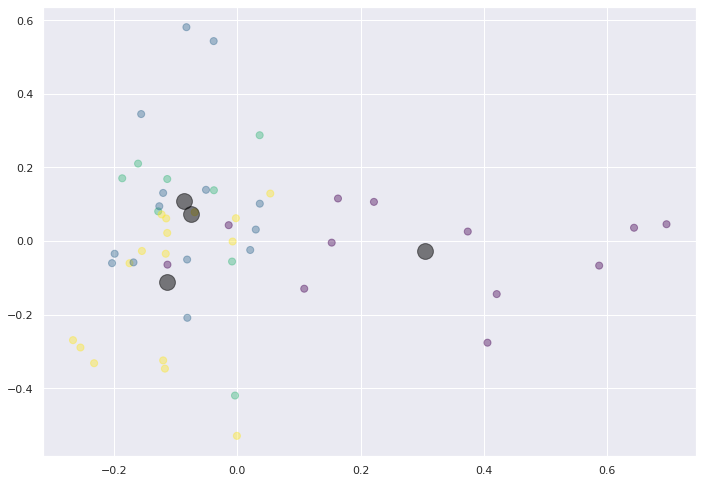

In [159]:
fig, ax = plt.subplots()
plt.scatter(vectors[:, 0], vectors[:, 1], c=y_kmeans, s=50, cmap='viridis', alpha=0.4)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=250, alpha=0.5);